In [1]:
from __future__ import print_function
from __future__ import division
%matplotlib inline

# 目标
- 计算图像梯度、寻找图像边缘。
- 涉及以下函数：**cv2.Sobel()**、**cv2.Scharr()**，**cv2.Laplacian()**等。

# 1. 理论
OpenCV提供了三种梯度滤波器（高通滤波器）：Sobel、Scharr和Laplacian。

## 1.1 Sobel和Scharr导数
Sobel算子是高斯平滑和微分的组合，能够更有效的对抗噪声。可以指定分别使用**yorder**和**xorder**参数指定沿垂直和水平的微分。也可以用**ksize**来指定核的大小。如果**ksize=-1**，将使用3x3的Scharr滤波器来代替3x3的Sobel滤波器。

## 1.2 Laplacian导数
利用$\Delta src =\frac {\partial^2 src} {\partial x^2} + \frac {\partial^2 src} {\partial y^2}$计算图像的Laplacian，其中的两个微分项用Sobel微分计算。如果**ksize=1**，则用下面的核进行滤波：
$$kernel = \begin{bmatrix}
0 & 1 & 0 \\
1 & -4 & 1 \\
0 & 1 & 0
\end{bmatrix}$$

# 2. 代码

(<matplotlib.text.Text at 0x119ea8d68>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

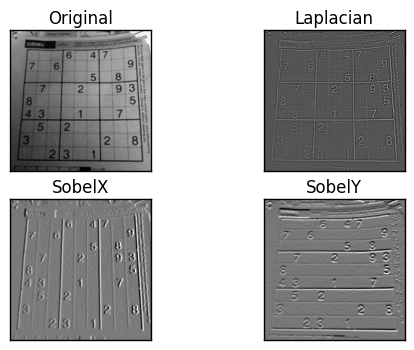

In [19]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('../data/dave.jpg', 0)
# img = cv2.GaussianBlur(img, (7, 7), 0)

laplacian = cv2.Laplacian(img, cv2.CV_64F) # 第二个参数指目标图像的数据类型
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)

plt.subplot(2, 2, 1), plt.imshow(img, cmap='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 2), plt.imshow(laplacian, cmap='gray', interpolation=None)
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 3), plt.imshow(sobelx, cmap='gray', interpolation=None)
plt.title('SobelX'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 4), plt.imshow(sobely, cmap='gray', interpolation=None)
plt.title('SobelY'), plt.xticks([]), plt.yticks([])

# 3. 注意事项
在最后的例子中，输出数据的类型被设置为**cv2.CV_8U**或**np.uint8**，这会带来一些问题。由黑到白的变化其斜率为正，由白到黑的斜率则是负的。因此用无符号八位整数类型时，负数就会被直接设置为0，导致丢失部分边缘。

如果希望同时找到这两种边缘，最好的选择就是更高的精度类型，例如**cv2.CV_16S**、**cv2.CV_64F**等。取绝对值然后转换回**cv2.CV_8U**，下面的代码展示了这两种处理方式的差别：

(<matplotlib.text.Text at 0x122d30b38>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

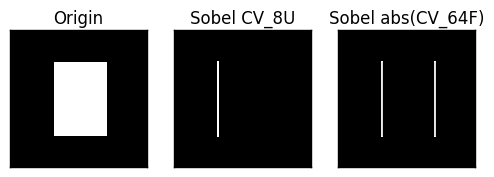

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('../data/box_little.png')

# 输出类型为8bits无符号整数
sobelx8u = cv2.Sobel(img, cv2.CV_8U, 1, 0, ksize=5)

# 输出类型为64bits浮点数，取绝对值后转成8bits无符号整数。
sobelx64f = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
abs_sobelx64 = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobelx64)

plt.subplot(1, 3, 1), plt.imshow(img, cmap='gray', interpolation=None)
plt.title('Origin'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 2), plt.imshow(sobelx8u, cmap='gray', interpolation=None)
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 3), plt.imshow(sobel_8u, cmap='gray', interpolation=None)
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])